In [2]:
def convolve2d(image, kernel):
    # 获取图像和卷积核的尺寸
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    # 计算输出的尺寸
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = [[0] * output_width for _ in range(output_height)]
    
    # 执行卷积操作
    for i in range(output_height):
        for j in range(output_width):
            sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    sum += image[i + m][j + n] * kernel[m][n]
            output[i][j] = sum
    
    return output

# 测试示例
image = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

kernel = [
    [1, 0],
    [0, -1]
]

result = convolve2d(image, kernel)
for row in result:
    print(row)


[-5, -5, -5]
[-5, -5, -5]
[-5, -5, -5]


In [181]:
from PIL import Image, ImageDraw
import numpy as np

# 加载图片
icon_path = "./icon1_1.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")  # 转换为灰度图
image = Image.open(image_path).convert("L")  # 转换为灰度图

# 第一步：将图标缩小到原宽高的1/2
icon_resized = icon.resize((icon.width // 2, icon.height // 2))

# 第二步：将图片转换为numpy数组
icon_array = np.array(icon_resized)
image_array = np.array(image)

# 第三步：执行多阶段卷积映射
def convolve_2d(image, kernel):
    """简单的2D卷积函数"""
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    # 添加边框填充
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # 初始化结果数组
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image_height):
        for j in range(image_width):
            # 元素相乘并求和
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    
    return result

# 第四步：创建匹配卷积核（以缩小后的图标为卷积核）
icon_normalized = icon_array - np.mean(icon_array)  # 归一化图标数据
kernel = icon_normalized / np.linalg.norm(icon_normalized)  # 单位归一化

# 第五步：对图片进行卷积操作
result = convolve_2d(image_array, kernel)

# 第六步：对卷积结果进行阈值处理，找到匹配区域
threshold = 0.991 * np.max(result)  # 阈值设置为最大值的90%
match_indices = np.argwhere(result > threshold)

# 去除重复的矩形框（合并靠近的匹配点）
filtered_matches = []
match_set = set()

for (y, x) in match_indices:
    close_match = False
    for (fy, fx) in filtered_matches:
        if abs(fy - y) < icon_resized.height and abs(fx - x) < icon_resized.width:
            close_match = True
            break
    if not close_match:
        filtered_matches.append((y, x))
        match_set.add((y, x))

# 第七步：在原图上绘制矩形框
image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)
icon_height, icon_width = icon_resized.size

for (y, x) in filtered_matches:
    top_left = (x - icon_width // 2, y - icon_height // 2)
    bottom_right = (x + icon_width // 2, y + icon_height // 2)
    draw.rectangle([top_left, bottom_right], outline="red", width=3)  # 红色矩形框，宽度为3

# 保存最终的结果图像
output_path = "./image_with_matches_final3.png"
image_with_boxes.save(output_path)

output_path


'./image_with_matches_final3.png'

In [193]:
#best result
from PIL import Image, ImageDraw
import numpy as np
 
icon_path = "./icon1_1.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")  
image = Image.open(image_path).convert("L") 

icon_resized = icon.resize((icon.width // 2, icon.height // 2))

# 第二步：将图片转换为numpy数组
icon_array = np.array(icon_resized)
image_array = np.array(image)

# 第三步：执行多阶段卷积映射
def convolve_2d(image, kernel):
    """简单的2D卷积函数"""
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    # 添加边框填充
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # 初始化结果数组
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image_height):
        for j in range(image_width):
            # 元素相乘并求和
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    
    return result

# 第四步：创建匹配卷积核（以缩小后的图标为卷积核）
icon_normalized = icon_array - np.mean(icon_array)  # 归一化图标数据
kernel = icon_normalized / np.linalg.norm(icon_normalized)  # 单位归一化

# 第五步：对图片进行卷积操作
result = convolve_2d(image_array, kernel)

# 第六步：对卷积结果进行阈值处理，找到匹配区域
threshold = 0.92 * np.max(result)  
match_indices = np.argwhere(result > threshold)

# 去除重复的矩形框（合并靠近的匹配点）
filtered_matches = []
match_set = set()

for (y, x) in match_indices:
    close_match = False
    for (fy, fx) in filtered_matches:
        if abs(fy - y) < icon_resized.height and abs(fx - x) < icon_resized.width:
            close_match = True
            break
    if not close_match:
        filtered_matches.append((y, x))
        match_set.add((y, x))

# 第七步：在原图上绘制矩形框
image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)
icon_height, icon_width = icon_resized.size

for (y, x) in filtered_matches:
    top_left = (x - icon_width // 2, y - icon_height // 2)
    bottom_right = (x + icon_width // 2, y + icon_height // 2)
    draw.rectangle([top_left, bottom_right], outline="red", width=3)  # 红色矩形框，宽度为3

# 保存最终的结果图像
output_path = "./image_with_matches_final3.png"
image_with_boxes.save(output_path)

output_path


'./image_with_matches_final3.png'

In [49]:
from PIL import Image, ImageDraw
import numpy as np

# Load the images
icon_path = "./icon.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")  # Convert to grayscale
image = Image.open(image_path).convert("L")  # Convert to grayscale

# Step 1: Resize the icon to 1/2 its width and height
icon_resized = icon.resize((icon.width // 2, icon.height // 2))
icon_resized.save("./icon_resized.png")

# Step 2: Convert images to numpy arrays
icon_array = np.array(icon_resized)
image_array = np.array(image)

# Step 3: Perform multi-stage convolution mapping
def convolve_2d(image, kernel):
    """Simple 2D convolution function."""
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    # Padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Output array
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image_height):
        for j in range(image_width):
            # Element-wise multiplication and sum
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    
    return result

# Step 4: Create a simple matching kernel (e.g., icon as a kernel)
icon_normalized = icon_array - np.mean(icon_array)  # Normalize the icon
kernel = icon_normalized / np.linalg.norm(icon_normalized)  # Unit normalization

# Step 5: Convolve the image with the kernel
result = convolve_2d(image_array, kernel)

# Step 6: Threshold the result to find matches
threshold = 0.9 * np.max(result)  # Matches above 90% of the max value
match_indices = np.argwhere(result > threshold)

# Step 7: Draw rectangles on the original image
image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)
icon_height, icon_width = icon_resized.size

for (y, x) in match_indices:
    top_left = (x - icon_width // 2, y - icon_height // 2)
    bottom_right = (x + icon_width // 2, y + icon_height // 2)
    draw.rectangle([top_left, bottom_right], outline="red", width=2)

# Save the output image
output_path = "./image_with_matches.png"
image_with_boxes.save(output_path)

output_path


'./image_with_matches.png'

In [85]:
from PIL import Image, ImageDraw
import numpy as np

icon_path = "./icon1.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")  
image = Image.open(image_path).convert("L")  

icon_resized = icon.resize((icon.width // 2, icon.height // 2))
icon_resized.save("./icon_resized.png")

icon_array = np.array(icon_resized)
image_array = np.array(image)

icon_height, icon_width = icon_array.shape
half_height, half_width = icon_height // 2, icon_width // 2

sub_icons = {
    "top_left": icon_array[:half_height, :half_width],
    "top_right": icon_array[:half_height, half_width:],
    "bottom_left": icon_array[half_height:, :half_width],
    "bottom_right": icon_array[half_height:, half_width:]
}

def convolve_2d(image, kernel):
    """Simple 2D convolution function."""
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    
    return result

matches = []
for sub_icon_name, sub_icon in sub_icons.items():
    sub_icon_normalized = sub_icon - np.mean(sub_icon)  
    kernel = sub_icon_normalized / np.linalg.norm(sub_icon_normalized)  
    result = convolve_2d(image_array, kernel)  
    
    threshold = 0.98 * np.max(result)  
    match_indices = np.argwhere(result > threshold)
    
    matches.append((sub_icon_name, match_indices))

image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)

for sub_icon_name, match_indices in matches:
    for (y, x) in match_indices:
        if sub_icon_name == "top_left":
            top_left = (x, y)
            bottom_right = (x + icon_width, y + icon_height)
        elif sub_icon_name == "top_right":
            top_left = (x - half_width, y)
            bottom_right = (x + half_width, y + icon_height)
        elif sub_icon_name == "bottom_left":
            top_left = (x, y - half_height)
            bottom_right = (x + icon_width, y + half_height)
        elif sub_icon_name == "bottom_right":
            top_left = (x - half_width, y - half_height)
            bottom_right = (x + half_width, y + half_height)
        
        draw.rectangle([top_left, bottom_right], outline="red", width=2)

output_path = "./image_with_matches_multistage.png"
image_with_boxes.save(output_path)

output_path


'./image_with_matches_multistage.png'

In [147]:
from PIL import Image, ImageDraw
import numpy as np

# 加载图片
icon_path = "./1.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")
image = Image.open(image_path).convert("L")

# 将图标缩小到原宽高的1/2
icon_resized = icon.resize((icon.width // 2, icon.height // 2))
icon_array = np.array(icon_resized)
image_array = np.array(image)

# 子图标分块
icon_height, icon_width = icon_array.shape
half_height, half_width = icon_height // 2, icon_width // 2

sub_icons = {
    "top_left": icon_array[:half_height, :half_width],
    "top_right": icon_array[:half_height, half_width:],
    "bottom_left": icon_array[half_height:, :half_width],
    "bottom_right": icon_array[half_height:, half_width:]
}

# 定义卷积函数
def convolve_2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    
    return result

# 匹配逻辑
matches = []
for sub_icon_name, sub_icon in sub_icons.items():
    sub_icon_normalized = sub_icon - np.mean(sub_icon)
    kernel = sub_icon_normalized / np.linalg.norm(sub_icon_normalized)
    result = convolve_2d(image_array, kernel)
    
    threshold = 0.9 * np.max(result)
    match_indices = np.argwhere(result > threshold)
    
    matches.append((sub_icon_name, match_indices))

# 框体合并逻辑
def merge_boxes(boxes, threshold=25):
    """合并框体，如果两个框体的距离小于阈值，将它们合并"""
    merged_boxes = []
    for box in boxes:
        merged = False
        for i, mbox in enumerate(merged_boxes):
            # 判断框体是否接近
            if abs(box[0][0] - mbox[0][0]) < threshold and abs(box[0][1] - mbox[0][1]) < threshold:
                # 合并框体
                new_top_left = (min(box[0][0], mbox[0][0]), min(box[0][1], mbox[0][1]))
                new_bottom_right = (max(box[1][0], mbox[1][0]), max(box[1][1], mbox[1][1]))
                merged_boxes[i] = (new_top_left, new_bottom_right)
                merged = True
                break
        if not merged:
            merged_boxes.append(box)
    return merged_boxes

# 在原图上绘制矩形框
image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)

# 收集所有框体
all_boxes = []
for sub_icon_name, match_indices in matches:
    for (y, x) in match_indices:
        if sub_icon_name == "top_left":
            top_left = (x, y)
            bottom_right = (x + icon_width, y + icon_height)
        elif sub_icon_name == "top_right":
            top_left = (x - half_width, y)
            bottom_right = (x + half_width, y + icon_height)
        elif sub_icon_name == "bottom_left":
            top_left = (x, y - half_height)
            bottom_right = (x + icon_width, y + half_height)
        elif sub_icon_name == "bottom_right":
            top_left = (x - half_width, y - half_height)
            bottom_right = (x + half_width, y + half_height)
        all_boxes.append((top_left, bottom_right))

# 合并框体
merged_boxes = merge_boxes(all_boxes)

# 绘制合并后的矩形框
for box in merged_boxes:
    draw.rectangle(box, outline="red", width=2)

# 保存最终结果
output_path = "./image_with_merged_boxes.png"
image_with_boxes.save(output_path)

output_path


'./image_with_merged_boxes.png'

In [199]:
from PIL import Image, ImageDraw
import numpy as np

# 加载图片
icon_path = "./icon1_1.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")
image = Image.open(image_path).convert("L")

# 将图标缩小到原宽高的1/2
icon_resized = icon.resize((icon.width // 2, icon.height // 2))
icon_array = np.array(icon_resized)
image_array = np.array(image)

# 子图标分块
icon_height, icon_width = icon_array.shape
half_height, half_width = icon_height // 2, icon_width // 2

sub_icons = {
    "top_left": icon_array[:half_height, :half_width],
    "top_right": icon_array[:half_height, half_width:],
    "bottom_left": icon_array[half_height:, :half_width],
    "bottom_right": icon_array[half_height:, half_width:]
}

# 定义卷积函数
def convolve_2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    
    return result

# 匹配逻辑
matches = []
for sub_icon_name, sub_icon in sub_icons.items():
    sub_icon_normalized = sub_icon - np.mean(sub_icon)
    kernel = sub_icon_normalized / np.linalg.norm(sub_icon_normalized)
    result = convolve_2d(image_array, kernel)
    
    threshold = 0.92 * np.max(result)
    match_indices = np.argwhere(result > threshold)
    
    for (y, x) in match_indices:
        if sub_icon_name == "top_left":
            top_left = (x, y)
            bottom_right = (x + icon_width, y + icon_height)
        elif sub_icon_name == "top_right":
            top_left = (x - half_width, y)
            bottom_right = (x + half_width, y + icon_height)
        elif sub_icon_name == "bottom_left":
            top_left = (x, y - half_height)
            bottom_right = (x + icon_width, y + half_height)
        elif sub_icon_name == "bottom_right":
            top_left = (x - half_width, y - half_height)
            bottom_right = (x + half_width, y + half_height)
        matches.append((top_left, bottom_right, np.max(result)))  # 添加置信度分数

# 定义NMS逻辑
def nms(boxes, scores, iou_threshold=0.6):
    """非极大值抑制"""
    if len(boxes) == 0:
        return []

    # 将框体和分数排序
    indices = np.argsort(scores)[::-1]  # 从大到小排序
    selected_boxes = []

    while len(indices) > 0:
        # 选择置信度最高的框体
        current = indices[0]
        selected_boxes.append(boxes[current])
        indices = indices[1:]

        remaining_boxes = [boxes[i] for i in indices]
        iou_values = [iou(boxes[current], b) for b in remaining_boxes]

        # 过滤掉IoU超过阈值的框体
        indices = [idx for idx, iou_value in zip(indices, iou_values) if iou_value < iou_threshold]

    return selected_boxes

def iou(box1, box2):
    """计算两个框体的交并比IoU"""
    x1, y1 = max(box1[0][0], box2[0][0]), max(box1[0][1], box2[0][1])
    x2, y2 = min(box1[1][0], box2[1][0]), min(box1[1][1], box2[1][1])

    intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    box1_area = (box1[1][0] - box1[0][0] + 1) * (box1[1][1] - box1[0][1] + 1)
    box2_area = (box2[1][0] - box2[0][0] + 1) * (box2[1][1] - box2[0][1] + 1)

    union = box1_area + box2_area - intersection
    return intersection / union

# 应用NMS
boxes = [box[:2] for box in matches]
scores = [box[2] for box in matches]
merged_boxes = nms(boxes, scores, iou_threshold=0.5)

# 在原图上绘制矩形框
image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)

for box in merged_boxes:
    draw.rectangle(box, outline="red", width=2)

# 保存最终结果
output_path = "./image_with_nms_boxes.png"
image_with_boxes.save(output_path)

output_path


'./image_with_nms_boxes.png'

In [201]:
from PIL import Image, ImageDraw
import numpy as np

# 加载图片
icon_path = "./icon1_1.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")  # 转换为灰度图
image = Image.open(image_path).convert("L")  # 转换为灰度图

# 第一步：将图标缩小到原宽高的1/2
icon_resized = icon.resize((icon.width // 2, icon.height // 2))

# 第二步：将图片和图标转换为numpy数组
icon_array = np.array(icon_resized)
image_array = np.array(image)

# 第三步：对图标进行分块
icon_height, icon_width = icon_array.shape
half_height, half_width = icon_height // 2, icon_width // 2

sub_icons = {
    "top_left": icon_array[:half_height, :half_width],
    "top_right": icon_array[:half_height, half_width:],
    "bottom_left": icon_array[half_height:, :half_width],
    "bottom_right": icon_array[half_height:, half_width:]
}

# 定义卷积函数
def convolve_2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    # 添加边框填充
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # 初始化结果数组
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    
    return result

# 多阶段卷积匹配
matches = []
for sub_icon_name, sub_icon in sub_icons.items():
    sub_icon_normalized = sub_icon - np.mean(sub_icon)
    kernel = sub_icon_normalized / np.linalg.norm(sub_icon_normalized)
    
    # 第一阶段：对子图标与图片进行卷积
    result_stage1 = convolve_2d(image_array, kernel)
    
    # 第二阶段：对第一阶段的结果进一步处理（简单平滑）
    result_stage2 = convolve_2d(result_stage1, np.ones((3, 3)) / 9)  # 简单平滑核
    
    # 第三阶段：最终匹配提取
    threshold = 0.92 * np.max(result_stage2)  # 取结果中的高值区域
    match_indices = np.argwhere(result_stage2 > threshold)
    
    for (y, x) in match_indices:
        # 根据子图标位置计算匹配框
        if sub_icon_name == "top_left":
            top_left = (x, y)
            bottom_right = (x + half_width, y + half_height)
        elif sub_icon_name == "top_right":
            top_left = (x - half_width, y)
            bottom_right = (x, y + half_height)
        elif sub_icon_name == "bottom_left":
            top_left = (x, y - half_height)
            bottom_right = (x + half_width, y)
        elif sub_icon_name == "bottom_right":
            top_left = (x - half_width, y - half_height)
            bottom_right = (x, y)
        
        matches.append((top_left, bottom_right))

# 合并匹配结果为完整的矩形框
image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)

# 合并所有匹配点并绘制矩形框
for box in matches:
    draw.rectangle([box[0], box[1]], outline="red", width=3)

# 保存最终结果
output_path = "./image_with_multistage_matches.png"
image_with_boxes.save(output_path)

output_path


'./image_with_multistage_matches.png'

In [233]:
from PIL import Image, ImageDraw
import numpy as np

# 加载图片 
icon_path = "./1_1.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")  # 转换为灰度图
image = Image.open(image_path).convert("L")  # 转换为灰度图

# 将图标缩小到原宽高的1/2
icon_resized = icon.resize((icon.width // 2, icon.height // 2))

# 将图标分割为多个小块
def split_icon(icon_array, grid_size):
    """将图标分割为grid_size x grid_size的小块"""
    h, w = icon_array.shape
    block_height, block_width = h // grid_size, w // grid_size
    blocks = []
    for i in range(grid_size):
        for j in range(grid_size):
            block = icon_array[
                i * block_height:(i + 1) * block_height,
                j * block_width:(j + 1) * block_width
            ]
            blocks.append(block)
    return blocks

# 2D卷积函数
def convolve_2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    return result

# 创建分割卷积核
icon_array = np.array(icon_resized)
icon_blocks = split_icon(icon_array, grid_size=2)  # 将图标分为2x2小块
kernels = []
for block in icon_blocks:
    block_normalized = block - np.mean(block)  # 去中心化
    if np.linalg.norm(block_normalized) != 0:
        kernel = block_normalized / np.linalg.norm(block_normalized)  # 单位归一化
        kernels.append(kernel)

# 多阶段卷积
image_array = np.array(image)
result_accumulated = np.zeros_like(image_array, dtype=np.float32)

for kernel in kernels:
    result_accumulated += convolve_2d(image_array, kernel)

# 阈值处理，找到匹配区域
threshold = 0.9 * np.max(result_accumulated)
match_indices = np.argwhere(result_accumulated > threshold)

# 合并匹配区域
filtered_matches = []
for (y, x) in match_indices:
    close_match = False
    for (fy, fx) in filtered_matches:
        if abs(fy - y) < icon_resized.height and abs(fx - x) < icon_resized.width:
            close_match = True
            break
    if not close_match:
        filtered_matches.append((y, x))

# 绘制匹配结果
image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)
icon_height, icon_width = icon_resized.size

for (y, x) in filtered_matches:
    top_left = (x - icon_width // 2, y - icon_height // 2)
    bottom_right = (x + icon_width // 2, y + icon_height // 2)
    draw.rectangle([top_left, bottom_right], outline="red", width=3)

# 保存最终图像
output_path = "./image_with_matches_multi_stage.png"
image_with_boxes.save(output_path)

output_path


'./image_with_matches_multi_stage.png'

In [243]:
from PIL import Image, ImageDraw
import numpy as np

# 加载图片 
icon_path = "./icon1_1.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")  # 转换为灰度图
image = Image.open(image_path).convert("L")  # 转换为灰度图

# 将图标缩小到原宽高的1/2
icon_resized = icon.resize((icon.width // 2, icon.height // 2))

# 将图标分割为多个小块
def split_icon(icon_array, grid_size):
    """将图标分割为grid_size x grid_size的小块"""
    h, w = icon_array.shape
    block_height, block_width = h // grid_size, w // grid_size
    blocks = []
    for i in range(grid_size):
        for j in range(grid_size):
            block = icon_array[
                i * block_height:(i + 1) * block_height,
                j * block_width:(j + 1) * block_width
            ]
            blocks.append(block)
    return blocks

# 2D卷积函数
def convolve_2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    return result

# 创建分割卷积核
icon_array = np.array(icon_resized)
icon_blocks = split_icon(icon_array, grid_size=2)  # 将图标分为2x2小块
kernels = []
for block in icon_blocks:
    block_normalized = block - np.mean(block)  # 去中心化
    if np.linalg.norm(block_normalized) != 0:
        kernel = block_normalized / np.linalg.norm(block_normalized)  # 单位归一化
        kernels.append(kernel)

# 多阶段卷积
image_array = np.array(image)
result_accumulated = np.zeros_like(image_array, dtype=np.float32)

for kernel in kernels:
    result_accumulated += convolve_2d(image_array, kernel)

# 阈值处理，找到匹配区域
threshold = 0.9 * np.max(result_accumulated)
match_indices = np.argwhere(result_accumulated > threshold)

# 合并匹配区域
filtered_matches = []
for (y, x) in match_indices:
    close_match = False
    for (fy, fx) in filtered_matches:
        if abs(fy - y) < icon_resized.height and abs(fx - x) < icon_resized.width:
            close_match = True
            break
    if not close_match:
        filtered_matches.append((y, x))

# 绘制匹配结果
image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)
icon_height, icon_width = icon_resized.size

# 增加边距
margin = 10  # 设置额外边距大小

for (y, x) in filtered_matches:
    # 增加边距计算矩形框
    top_left = (x - icon_width // 2 - margin, y - icon_height // 2 - margin)
    bottom_right = (x + icon_width // 2 + margin, y + icon_height // 2 + margin)
    draw.rectangle([top_left, bottom_right], outline="red", width=3)

# 保存最终图像
output_path = "./image_with_matches_multi_stage_margin.png"
image_with_boxes.save(output_path)

output_path


'./image_with_matches_multi_stage_margin.png'

In [297]:
from PIL import Image, ImageDraw
import numpy as np

# 加载图片 
icon_path = "./icon1_1.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")  # 转换为灰度图
image = Image.open(image_path).convert("L")  # 转换为灰度图

# 将图标缩小到原宽高的1/2
icon_resized = icon.resize((icon.width // 2, icon.height // 2))

# 将图标分割为多个小块
def split_icon(icon_array, grid_size):
    """将图标分割为grid_size x grid_size的小块"""
    h, w = icon_array.shape
    block_height, block_width = h // grid_size, w // grid_size
    blocks = []
    for i in range(grid_size):
        for j in range(grid_size):
            block = icon_array[
                i * block_height:(i + 1) * block_height,
                j * block_width:(j + 1) * block_width
            ]
            blocks.append(block)
    return blocks

# 2D卷积函数
def convolve_2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    return result

# 创建分割卷积核
icon_array = np.array(icon_resized)
icon_blocks = split_icon(icon_array, grid_size=2)  # 将图标分为2x2小块
kernels = []
for block in icon_blocks:
    block_normalized = block - np.mean(block)  # 去中心化
    if np.linalg.norm(block_normalized) != 0:
        kernel = block_normalized / np.linalg.norm(block_normalized)  # 单位归一化
        kernels.append(kernel)

# 多阶段卷积
image_array = np.array(image)
result_accumulated = np.zeros_like(image_array, dtype=np.float32)

for kernel in kernels:
    result_accumulated += convolve_2d(image_array, kernel)

# 阈值处理，找到匹配区域
threshold = 0.87 * np.max(result_accumulated)
match_indices = np.argwhere(result_accumulated > threshold)

# 转换为矩形框坐标
icon_height, icon_width = icon_resized.size
margin = 0  # 额外边距

boxes = []
for (y, x) in match_indices:
    top_left = (x - icon_width // 2 - margin, y - icon_height // 2 - margin)
    bottom_right = (x + icon_width // 2 + margin, y + icon_height // 2 + margin)
    boxes.append([top_left[0], top_left[1], bottom_right[0], bottom_right[1]])  # [x1, y1, x2, y2]

# 非极大值抑制 (NMS)
def nms(boxes, iou_threshold=0.7):
    """执行非极大值抑制"""
    if len(boxes) == 0:
        return []
    
    # 转换为 NumPy 数组
    boxes = np.array(boxes)
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    # 计算每个框的面积
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = areas.argsort()[::-1]  # 按面积降序排序

    keep = []  # 保存保留的框的索引
    while order.size > 0:
        i = order[0]  # 当前面积最大的框
        keep.append(i)

        # 计算当前框与剩余框的 IoU
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        inter = w * h
        iou = inter / (areas[i] + areas[order[1:]] - inter)

        # 仅保留 IoU 小于阈值的框
        order = order[1:][iou <= iou_threshold]

    return boxes[keep]

# 应用 NMS
nms_boxes = nms(boxes, iou_threshold=0.5)

# 绘制匹配结果
image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)

for box in nms_boxes:
    draw.rectangle([box[0], box[1], box[2], box[3]], outline="red", width=3)

# 保存最终图像
output_path = "./image_with_matches_nms.png"
image_with_boxes.save(output_path)

output_path


'./image_with_matches_nms.png'

In [323]:
from PIL import Image, ImageDraw
import numpy as np

# 加载图片 
icon_path = "./icon2_1.png"
image_path = "./image.png"

icon = Image.open(icon_path).convert("L")  # 转换为灰度图
image = Image.open(image_path).convert("L")  # 转换为灰度图

# 将图标缩小到原宽高的1/2
icon_resized = icon.resize((icon.width // 2, icon.height // 2))

# 将图标分割为多个小块
def split_icon(icon_array, grid_size):
    """将图标分割为grid_size x grid_size的小块"""
    h, w = icon_array.shape
    block_height, block_width = h // grid_size, w // grid_size
    blocks = []
    for i in range(grid_size):
        for j in range(grid_size):
            block = icon_array[
                i * block_height:(i + 1) * block_height,
                j * block_width:(j + 1) * block_width
            ]
            blocks.append(block)
    return blocks

# 2D卷积函数
def convolve_2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
    return result

# 创建分割卷积核
icon_array = np.array(icon_resized)
icon_blocks = split_icon(icon_array, grid_size=3)  # 将图标分为2x2小块
kernels = []
for block in icon_blocks:
    block_normalized = block - np.mean(block)  # 去中心化
    if np.linalg.norm(block_normalized) != 0:
        kernel = block_normalized / np.linalg.norm(block_normalized)  # 单位归一化
        kernels.append(kernel)

# 多阶段卷积
image_array = np.array(image)
result_accumulated = np.zeros_like(image_array, dtype=np.float32)

for kernel in kernels:
    result_accumulated += convolve_2d(image_array, kernel)

# 阈值处理，找到匹配区域
threshold = 0.9 * np.max(result_accumulated)
match_indices = np.argwhere(result_accumulated > threshold)

# 转换为矩形框坐标
icon_height, icon_width = icon_resized.size
margin = 0  # 额外边距

boxes = []
for (y, x) in match_indices:
    top_left = (x - icon_width // 2 - margin, y - icon_height // 2 - margin)
    bottom_right = (x + icon_width // 2 + margin, y + icon_height // 2 + margin)
    boxes.append([top_left[0], top_left[1], bottom_right[0], bottom_right[1]])  # [x1, y1, x2, y2]

# 非极大值抑制 (NMS)
def nms(boxes, iou_threshold=0.7):
    """执行非极大值抑制"""
    if len(boxes) == 0:
        return []
    
    # 转换为 NumPy 数组
    boxes = np.array(boxes)
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    # 计算每个框的面积
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = areas.argsort()[::-1]  # 按面积降序排序

    keep = []  # 保存保留的框的索引
    while order.size > 0:
        i = order[0]  # 当前面积最大的框
        keep.append(i)

        # 计算当前框与剩余框的 IoU
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        inter = w * h
        iou = inter / (areas[i] + areas[order[1:]] - inter)

        # 仅保留 IoU 小于阈值的框
        order = order[1:][iou <= iou_threshold]

    return boxes[keep]

# 应用 NMS
nms_boxes = nms(boxes, iou_threshold=0.5)

# 绘制匹配结果
image_with_boxes = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image_with_boxes)

for box in nms_boxes:
    draw.rectangle([box[0], box[1], box[2], box[3]], outline="red", width=3)

# 保存最终图像
output_path = "./image_with_matches_nms.png"
image_with_boxes.save(output_path)

output_path


'./image_with_matches_nms.png'

In [325]:
from PIL import Image

# Load the images
icon_path = "./icon.png"
image_path = "./image.png"

icon_img = Image.open(icon_path).convert("L")  # Convert to grayscale for simplicity
image_img = Image.open(image_path).convert("L")

icon_img.show()
image_img.show()

# Dimensions of the images
icon_width, icon_height = icon_img.size
image_width, image_height = image_img.size

# Divide the icon into 4 equal parts
icon_blocks = []
block_width = icon_width // 2
block_height = icon_height // 2

for i in range(2):
    for j in range(2):
        block = icon_img.crop((j * block_width, i * block_height, (j + 1) * block_width, (i + 1) * block_height))
        icon_blocks.append(block)

# Display the four blocks to verify the segmentation
icon_blocks[0].show()
icon_blocks[1].show()
icon_blocks[2].show()
icon_blocks[3].show()

# Proceed with manual convolution next


In [327]:
import numpy as np

# Convert PIL images to numpy arrays for easier pixel manipulation
icon_array = np.array(icon_img)
image_array = np.array(image_img)

# Prepare convolution: simple sum of squared differences (SSD) method
def compute_ssd(template, region):
    """
    Compute the Sum of Squared Differences (SSD) between the template and region.
    """
    diff = template - region
    return np.sum(diff ** 2)

# Function to apply multi-stage convolution
def multi_stage_convolution(icon_array, image_array, block_width, block_height):
    """
    Perform multi-stage convolution to find the best match of icon in image.
    """
    icon_h, icon_w = icon_array.shape
    img_h, img_w = image_array.shape
    best_matches = []

    # Iterate through the image where the template can fit
    for y in range(img_h - icon_h + 1):
        for x in range(img_w - icon_w + 1):
            # Extract the region of the image with the same size as the template
            region = image_array[y:y+icon_h, x:x+icon_w]
            
            # Convolve for each block and sum SSDs
            total_ssd = 0
            for i in range(2):
                for j in range(2):
                    block_template = icon_array[i * block_height:(i + 1) * block_height,
                                                j * block_width:(j + 1) * block_width]
                    block_region = region[i * block_height:(i + 1) * block_height,
                                          j * block_width:(j + 1) * block_width]
                    total_ssd += compute_ssd(block_template, block_region)
            
            # Store the match (x, y, score)
            best_matches.append((x, y, total_ssd))
    
    # Sort matches by lowest SSD (best match)
    best_matches.sort(key=lambda x: x[2])
    return best_matches

# Perform convolution to find matches
matches = multi_stage_convolution(icon_array, image_array, block_width, block_height)

# Display the best match location
best_match = matches[0]
best_match


(234, 2, 65180)

In [331]:
# Mark the best match location on the image
from PIL import ImageDraw

# Create a copy of the original image for marking
result_img = image_img.copy()
draw = ImageDraw.Draw(result_img)

# Draw a rectangle around the best match
x, y, _ = best_match
draw.rectangle([x, y, x + icon_width, y + icon_height], outline=255, width=2)

# Show the result
result_img.show()


In [333]:
from PIL import Image, ImageDraw
import numpy as np

# 加载图像
icon_path = "./icon.png"
image_path = "./image.png"

icon_img = Image.open(icon_path).convert("L")  # 将图标转换为灰度图
image_img = Image.open(image_path).convert("L")  # 将目标图像转换为灰度图

# 转换为数组以便进行计算
icon_array = np.array(icon_img)
image_array = np.array(image_img)

# 分块尺寸
icon_width, icon_height = icon_img.size
block_width = icon_width // 2
block_height = icon_height // 2

# 计算SSD（平方差和）
def compute_ssd(template, region):
    """
    计算模板与区域的平方差和 (SSD)。
    """
    diff = template - region
    return np.sum(diff ** 2)

# 多阶段卷积函数
def multi_stage_convolution(icon_array, image_array, block_width, block_height):
    """
    多阶段卷积，在大图中查找最匹配的小图区域。
    """
    icon_h, icon_w = icon_array.shape
    img_h, img_w = image_array.shape
    best_matches = []

    # 遍历目标图像所有可能的匹配区域
    for y in range(img_h - icon_h + 1):
        for x in range(img_w - icon_w + 1):
            # 提取目标图像中的对应区域
            region = image_array[y:y+icon_h, x:x+icon_w]
            
            # 对每个块计算SSD并累加
            total_ssd = 0
            for i in range(2):
                for j in range(2):
                    block_template = icon_array[i * block_height:(i + 1) * block_height,
                                                j * block_width:(j + 1) * block_width]
                    block_region = region[i * block_height:(i + 1) * block_height,
                                          j * block_width:(j + 1) * block_width]
                    total_ssd += compute_ssd(block_template, block_region)
            
            # 存储匹配结果 (x, y, score)
            best_matches.append((x, y, total_ssd))
    
    # 按照SSD从小到大排序（值越小匹配越好）
    best_matches.sort(key=lambda x: x[2])
    return best_matches

# 执行卷积，找到最佳匹配
matches = multi_stage_convolution(icon_array, image_array, block_width, block_height)

# 获取最优匹配结果
best_match = matches[0]
x, y, _ = best_match

# 在原图中标记匹配区域
result_img = image_img.copy()
draw = ImageDraw.Draw(result_img)
draw.rectangle([x, y, x + icon_width, y + icon_height], outline="red", width=3)

# 保存结果图片
output_path = "./matched_image.png"
result_img.save(output_path)

# 提供匹配结果图片路径
print(f"最佳匹配位置: (x={x}, y={y})")
print(f"标记后的图片保存于: {output_path}")


最佳匹配位置: (x=234, y=2)
标记后的图片保存于: ./matched_image.png


In [361]:
from PIL import Image, ImageDraw
import numpy as np

# 加载图像
icon_path = "./icon.png"
image_path = "./image.png"

icon_img = Image.open(icon_path).convert("L")  # 将图标转换为灰度图
image_img = Image.open(image_path).convert("L")  # 将目标图像转换为灰度图

# 转换为数组以便进行计算
icon_array = np.array(icon_img)
image_array = np.array(image_img)

# 分块尺寸
icon_width, icon_height = icon_img.size
block_width = icon_width // 2
block_height = icon_height // 2

# 计算SSD（平方差和）
def compute_ssd(template, region):
    """
    计算模板与区域的平方差和 (SSD)。
    """
    diff = template - region
    return np.sum(diff ** 2)

# 多阶段卷积函数
def multi_stage_convolution(icon_array, image_array, block_width, block_height):
    """
    多阶段卷积，在大图中查找最匹配的小图区域。
    """
    icon_h, icon_w = icon_array.shape
    img_h, img_w = image_array.shape
    matches = []

    # 遍历目标图像所有可能的匹配区域
    for y in range(img_h - icon_h + 1):
        for x in range(img_w - icon_w + 1):
            # 提取目标图像中的对应区域
            region = image_array[y:y+icon_h, x:x+icon_w]
            
            # 对每个块计算SSD并累加
            total_ssd = 0
            for i in range(2):
                for j in range(2):
                    block_template = icon_array[i * block_height:(i + 1) * block_height,
                                                j * block_width:(j + 1) * block_width]
                    block_region = region[i * block_height:(i + 1) * block_height,
                                          j * block_width:(j + 1) * block_width]
                    total_ssd += compute_ssd(block_template, block_region)
            
            # 存储匹配结果 (x, y, score)
            matches.append((x, y, total_ssd))
    
    # 按照SSD从小到大排序（值越小匹配越好）
    matches.sort(key=lambda x: x[2])
    return matches

# 执行卷积，找到所有匹配
matches = multi_stage_convolution(icon_array, image_array, block_width, block_height)

# 获取最佳匹配的误差阈值（如误差比最优误差小10%）
threshold = matches[0][2] * 1.5
filtered_matches = [match for match in matches if match[2] <= threshold]

# 在原图中标记所有符合条件的匹配区域
result_img = image_img.copy()
draw = ImageDraw.Draw(result_img)

for match in filtered_matches:
    x, y, _ = match
    draw.rectangle([x, y, x + icon_width, y + icon_height], outline="red", width=3)

# 保存结果图片
output_path = "./matched_image_all.png"
result_img.save(output_path)

# 提供匹配结果
print(f"匹配的区域数量: {len(filtered_matches)}")
print(f"标记后的图片保存于: {output_path}")


匹配的区域数量: 1
标记后的图片保存于: ./matched_image_all.png


In [11]:
from PIL import Image, ImageDraw
import numpy as np

square_path = "./square.png"
image_path = "./image.png"

square = Image.open(square_path).convert("L")  
image = Image.open(image_path).convert("L") 

# 将图标缩小到原宽高的1/2
icon = square.resize((square.width // 2, square.height // 2))
icon

In [15]:
icon_resized = icon.resize((icon.width // 2, icon.height // 2))

AttributeError: 'Image' object has no attribute 'shape'

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the template image (square.png) and the target image (image.png)
icon_path = "./square.png"
image_path = "./image.png"
 
# Open the images
icon_img = Image.open(icon_path).convert("L")  # Convert to grayscale
image_img = Image.open(image_path).convert("L")  # Convert to grayscale

template_img = icon_img.resize((icon_img.width // 2, icon_img.height // 2))

# Convert to numpy arrays
template_array = np.array(template_img)
image_array = np.array(image_img)

In [9]:
template_array, image_array

(array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255],
        [255, 255, 230, 159, 155, 155, 155, 155, 155, 155, 155, 155, 155,
         155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
         155, 155, 154, 166, 240, 255],
        [255, 255, 182,  37, 106, 109, 109, 109, 109, 109, 109, 109, 109,
         109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
         109, 110, 100,  40, 211, 255],
        [255, 255, 181,  86, 251, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 238,  67, 209, 255],
        [255, 255, 181,  86, 250, 255, 255, 255, 255, 255, 2

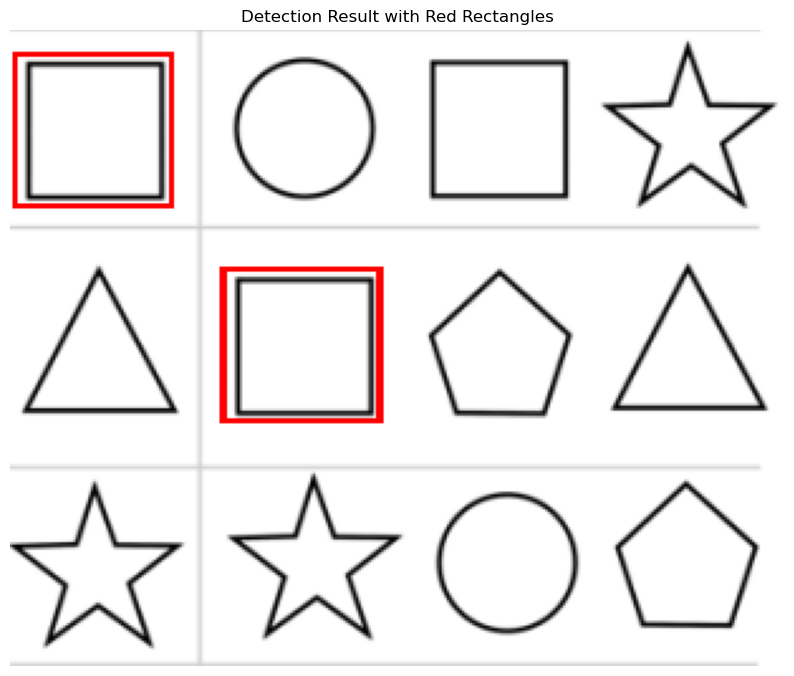

In [11]:
# Step 1: Resize the template to 2x scale (4x area increase)
def resize_image(image, scale):
    h, w = image.shape
    new_h, new_w = int(h * scale), int(w * scale)
    resized = np.zeros((new_h, new_w), dtype=image.dtype)
    for i in range(new_h):
        for j in range(new_w):
            # Map back to original coordinates
            orig_x, orig_y = int(i / scale), int(j / scale)
            resized[i, j] = image[orig_x, orig_y]
    return resized

scaled_template = resize_image(template_array, scale=2)

# Step 2: Convolution Matching Function
def convolution_match(target, template):
    t_h, t_w = template.shape
    i_h, i_w = target.shape
    result = np.zeros((i_h - t_h + 1, i_w - t_w + 1))

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            patch = target[i:i + t_h, j:j + t_w]
            result[i, j] = np.sum((patch - template)**2)  # Sum of squared differences (SSD)
    return result

# Step 3: Perform template matching
match_result = convolution_match(image_array, scaled_template)

# Step 4: Find best match positions
min_val = np.min(match_result)
threshold = min_val + (np.max(match_result) - min_val) * 0.1  # A simple threshold
locations = np.where(match_result <= threshold)

# Step 5 (Refinement): Draw rectangles with red borders on the original image
def draw_red_rectangles(image, locations, template_shape):
    # Convert to RGB to allow red color drawing
    output = np.stack([image] * 3, axis=-1)
    t_h, t_w = template_shape
    for loc in zip(*locations):
        y, x = loc
        # Draw a red rectangle (255, 0, 0)
        output[y:y + t_h, x:x + 2] = [255, 0, 0]  # Left border
        output[y:y + t_h, x + t_w - 2:x + t_w] = [255, 0, 0]  # Right border
        output[y:y + 2, x:x + t_w] = [255, 0, 0]  # Top border
        output[y + t_h - 2:y + t_h, x:x + t_w] = [255, 0, 0]  # Bottom border
    return output

# Highlight detections with red rectangles
highlighted_image_with_rectangles = draw_red_rectangles(image_array, locations, scaled_template.shape)

# Display the final detection result with red rectangles
plt.figure(figsize=(10, 10))
plt.title("Detection Result with Red Rectangles")
plt.imshow(highlighted_image_with_rectangles, cmap="gray")
plt.axis("off")
plt.show()

In [21]:
def pooling_downsample(image, pool_size=2):
    """
    对图像进行池化（下采样）操作，使其面积缩小为原来的1/4
    image: 输入的二维灰度图像（numpy数组）
    pool_size: 池化区域的大小，默认为2（2x2）
    """
    h, w = image.shape
    new_h, new_w = h // pool_size, w // pool_size  # 新图像尺寸
    downsampled_image = np.zeros((new_h, new_w), dtype=image.dtype)  # 初始化新图像

    for i in range(new_h):
        for j in range(new_w):
            # 获取当前池化窗口的起始位置
            start_x, start_y = i * pool_size, j * pool_size
            # 获取池化窗口内的所有值
            pool_region = image[start_x:start_x + pool_size, start_y:start_y + pool_size]
            # 计算池化结果，这里使用最大池化
            downsampled_image[i, j] = np.max(pool_region)

    return downsampled_image

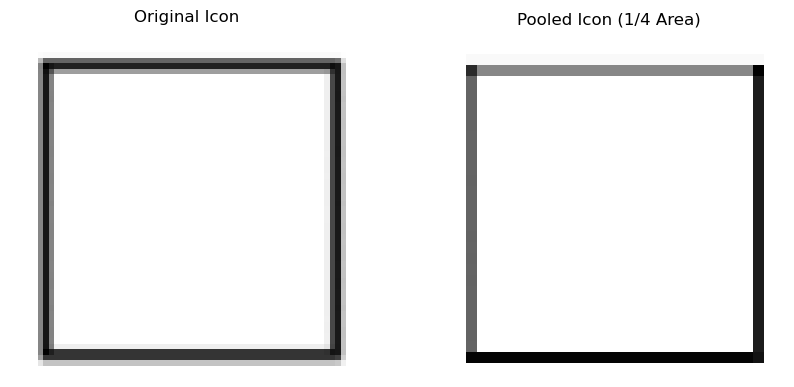

In [23]:
# 重新加载图像并进行池化
icon_path = "./square.png"  # 请确保路径正确

# 加载图像并转换为灰度
icon_img = Image.open(icon_path).convert("L")

# 将图像转换为 numpy 数组
icon_array = np.array(icon_img)

# 对图像进行池化（下采样）
pooled_icon_array = pooling_downsample(icon_array)

# 显示原始图像和池化后的图像
plt.figure(figsize=(10, 5))

# 原始图像
plt.subplot(1, 2, 1)
plt.title("Original Icon")
plt.imshow(icon_array, cmap="gray")
plt.axis("off")

# 池化后的图像
plt.subplot(1, 2, 2)
plt.title("Pooled Icon (1/4 Area)")
plt.imshow(pooled_icon_array, cmap="gray")
plt.axis("off")

plt.show()


原始图像尺寸: (63, 64)
池化后图像尺寸: (31, 32)


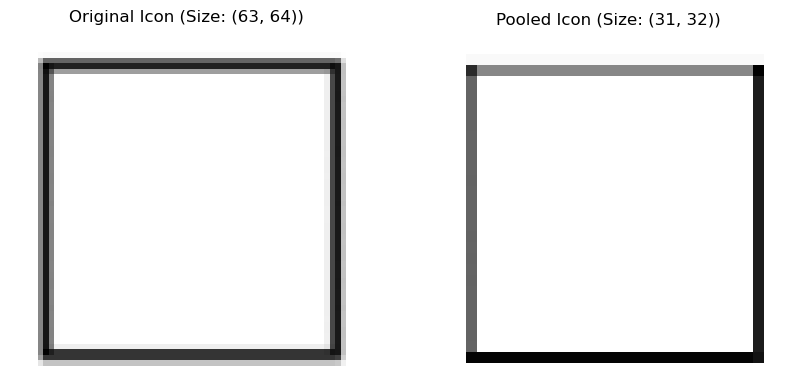

In [25]:
# 输出原始图像和池化后图像的尺寸
print("原始图像尺寸:", icon_array.shape)
print("池化后图像尺寸:", pooled_icon_array.shape)

# 显示图像，严格按照像素比例
plt.figure(figsize=(10, 5))

# 原始图像
plt.subplot(1, 2, 1)
plt.title(f"Original Icon (Size: {icon_array.shape})")
plt.imshow(icon_array, cmap="gray")
plt.axis("off")

# 池化后的图像
plt.subplot(1, 2, 2)
plt.title(f"Pooled Icon (Size: {pooled_icon_array.shape})")
plt.imshow(pooled_icon_array, cmap="gray")
plt.axis("off")

plt.show()


----------------------------------------------------------------------------------------

In [1]:
#导入图片
#将图片储存为矩阵
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the template image (square.png) and the target image (image.png)
square_path = "./square.png"
image_path = "./image.png"
 
# Open the images
square_img = Image.open(square_path).convert("L")  # Convert to grayscale
image_img = Image.open(image_path).convert("L")  # Convert to grayscale

# Convert to numpy arrays
square_array = np.array(square_img)
image_array = np.array(image_img)

In [89]:
def apply_padding(image, padding_size=1):
    padded_image = np.pad(image, pad_width=padding_size, mode='constant', constant_values=0)
    return padded_image

def convolution_sobel(image):
    # 定义 Sobel 核
    sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # 对图像进行填充，避免边缘像素丢失
    padded_image = apply_padding(image, padding_size=1)
    height, width = image.shape
    sobel_x = np.zeros_like(image, dtype=float)  # 存储水平方向的边缘结果
    sobel_y = np.zeros_like(image, dtype=float)  # 存储垂直方向的边缘结果

    # 使用卷积计算 Sobel 特征
    for i in range(height):
        for j in range(width):
            # 提取当前窗口
            region = padded_image[i:i+3, j:j+3]
            # 计算水平方向和垂直方向的卷积结果
            sobel_x[i, j] = np.sum(region * sobel_x_kernel)
            sobel_y[i, j] = np.sum(region * sobel_y_kernel)

    # 综合水平方向和垂直方向的边缘特征
    sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
    return sobel_x, sobel_y, sobel_combined
# 提取 Sobel 特征
sobel_x, sobel_y, sobel_combined = convolution_sobel(image_array)

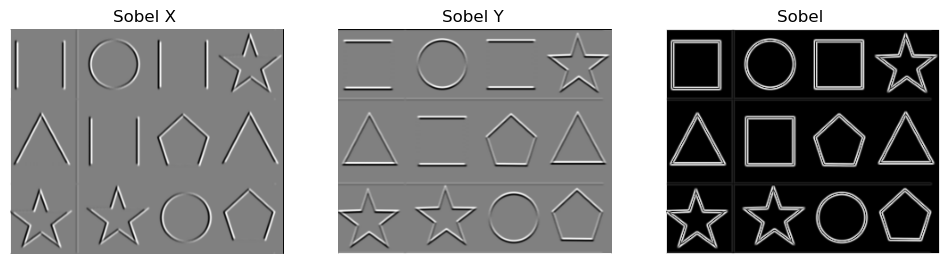

In [91]:
#展示图像卷积后的效果
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Sobel X ")
plt.imshow(sobel_x, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sobel Y ")
plt.imshow(sobel_y, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sobel ")
plt.imshow(sobel_combined, cmap="gray")
plt.axis("off")

plt.show()

In [93]:
#relu激活函数
def relu_activation(feature_map):
    # 获取特征图的尺寸
    height, width = feature_map.shape
    # 初始化输出特征图
    activated_map = np.zeros((height, width))

    # 遍历特征图的每个像素，应用 ReLU 函数
    for i in range(height):
        for j in range(width):
            # ReLU 激活函数：如果值小于 0，则置为 0；否则保留原值
            activated_map[i, j] = max(0, feature_map[i, j])

    return activated_map
# 应用 ReLU 激活函数
relu_activated_map = relu_activation(sobel_combined)

In [95]:
relu_activated_map

array([[1030.48047046, 1012.        , 1012.        , ..., 1020.        ,
        1020.        , 1081.87337522],
       [ 987.97267169,  132.        ,  132.        , ...,    0.        ,
           0.        , 1020.        ],
       [1018.01768158,    8.        ,    8.        , ...,    0.        ,
           0.        , 1020.        ],
       ...,
       [1003.14904177,   64.        ,   64.        , ...,    0.        ,
           0.        , 1020.        ],
       [ 954.82982777,  152.        ,  152.        , ...,    0.        ,
           0.        , 1020.        ],
       [ 982.00305499,  956.        ,  956.        , ..., 1020.        ,
        1020.        , 1081.87337522]])

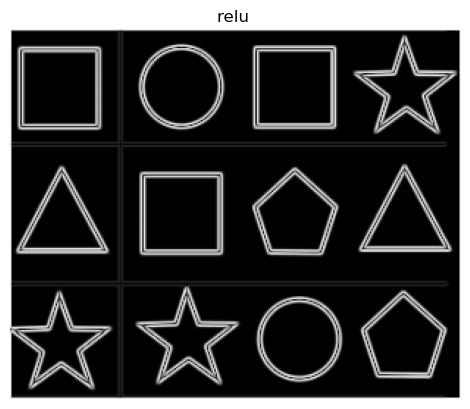

In [97]:
plt.subplot()
plt.title("relu ")
plt.imshow(relu_activated_map, cmap="gray")
plt.axis("off")

plt.show()

In [99]:
#池化(下采样)函数
def pooling_downsample(image, pool_size=2):
    """
    对图像进行池化（下采样）操作，使其面积缩小为原来的1/4
    image: 输入的二维灰度图像（numpy数组）
    pool_size: 池化区域的大小，默认为2（2x2）
    """
    h, w = image.shape
    new_h, new_w = h // pool_size, w // pool_size  # 新图像尺寸
    downsampled_image = np.zeros((new_h, new_w), dtype=image.dtype)  # 初始化新图像

    for i in range(new_h):
        for j in range(new_w):
            # 获取当前池化窗口的起始位置
            start_x, start_y = i * pool_size, j * pool_size
            # 获取池化窗口内的所有值
            pool_region = image[start_x:start_x + pool_size, start_y:start_y + pool_size]
            # 计算池化结果，这里使用最大池化
            downsampled_image[i, j] = np.max(pool_region)

    return downsampled_image

In [101]:
#对图像进行池化(下采样)
pooled_image_array = pooling_downsample(relu_activated_map)

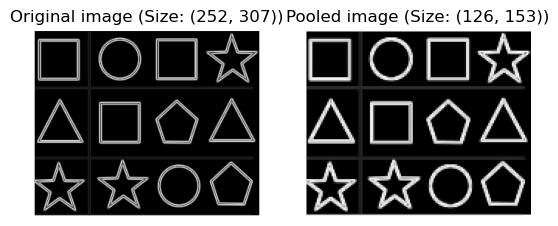

In [103]:
# 原始图像
plt.subplot(1, 2, 1)
plt.title(f"Original image (Size: {sobel_combined.shape})")
plt.imshow(sobel_combined, cmap="gray")
plt.axis("off")

# 池化后的图像
plt.subplot(1, 2, 2)
plt.title(f"Pooled image (Size: {pooled_image_array.shape})")
plt.imshow(pooled_image_array, cmap="gray")
plt.axis("off")

plt.show()

In [147]:
#制作图标特征
icon_sobel_x, icon_sobel_y, icon_sobel_combined = convolution_sobel(square_array)
relu_icon = relu_activation(icon_sobel_combined)
pooled_icon = pooling_downsample(relu_icon)

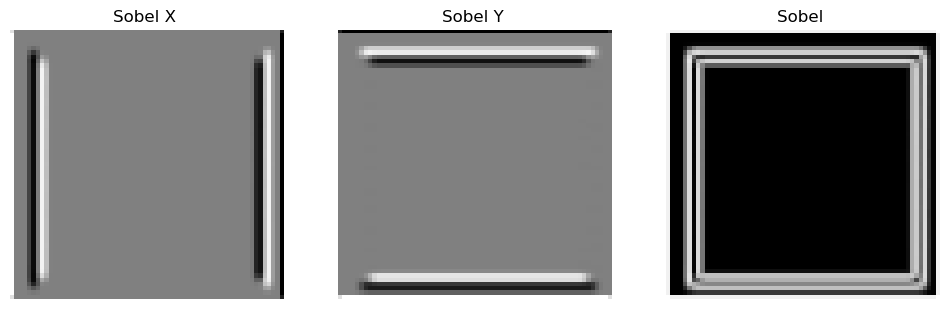

In [143]:
#展示图像卷积后的效果
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Sobel X ")
plt.imshow(icon_sobel_x, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sobel Y ")
plt.imshow(icon_sobel_y, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sobel ")
plt.imshow(icon_sobel_combined, cmap="gray")
plt.axis("off")

plt.show()

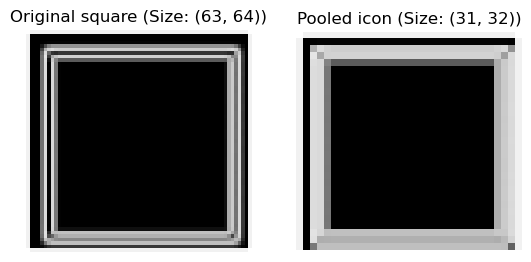

In [151]:
#图标展示
plt.subplot(1, 2, 1)
plt.title(f"Original square (Size: {icon_sobel_combined.shape})")
plt.imshow(icon_sobel_combined, cmap="gray")
plt.axis("off")

# 池化后的图像
plt.subplot(1, 2, 2)
plt.title(f"Pooled icon (Size: {pooled_icon.shape})")
plt.imshow(pooled_icon, cmap="gray")
plt.axis("off")

plt.show()

In [169]:
#ncc
def normalized_cross_correlation(image, template):
    h, w = image.shape
    th, tw = template.shape
    ncc_map = np.zeros((h - th + 1, w - tw + 1))

    template_mean = np.mean(template)
    template_std = np.std(template)

    for i in range(h - th + 1):
        for j in range(w - tw + 1):
            region = image[i:i + th, j:j + tw]
            region_mean = np.mean(region)
            region_std = np.std(region)

            if region_std > 0 and template_std > 0:
                numerator = np.sum((region - region_mean) * (template - template_mean))
                denominator = th * tw * region_std * template_std
                ncc_map[i, j] = numerator / denominator

    return ncc_map

In [171]:
#nms
def non_maximum_suppression(ncc_map, threshold, window_size=10):
    h, w = ncc_map.shape
    boxes = []

    for i in range(h):
        for j in range(w):
            if ncc_map[i, j] >= threshold:
                is_maximum = True
                for di in range(-window_size // 2, window_size // 2 + 1):
                    for dj in range(-window_size // 2, window_size // 2 + 1):
                        ni, nj = i + di, j + dj
                        if 0 <= ni < h and 0 <= nj < w and ncc_map[ni, nj] > ncc_map[i, j]:
                            is_maximum = False
                            break
                    if not is_maximum:
                        break
                if is_maximum:
                    boxes.append((i, j))
    return boxes

In [173]:
#red matrix
def draw_boxes(image, boxes, template_height, template_width):
    output_image = np.stack([image] * 3, axis=-1)

    for box in boxes:
        i, j = box
        for x in range(template_width):
            if j + x < output_image.shape[1]:
                output_image[i, j + x] = [255, 0, 0]
                output_image[i + template_height - 1, j + x] = [255, 0, 0]
        for y in range(template_height):
            if i + y < output_image.shape[0]:
                output_image[i + y, j] = [255, 0, 0]
                output_image[i + y, j + template_width - 1] = [255, 0, 0]

    return output_image


In [175]:
# 计算 NCC 相似度矩阵
ncc_map = normalized_cross_correlation(pooled_image_array, pooled_icon)


In [177]:
# 设置相似度阈值并进行非极大值抑制
threshold = 0.5
boxes = non_maximum_suppression(ncc_map, threshold=threshold)

In [179]:
# 将检测到的框体坐标映射回原始图像
pool_size = 2
original_boxes = [(i * pool_size, j * pool_size) for i, j in boxes]

In [181]:
# 原始模板的高度和宽度
template_h, template_w = pooled_icon.shape
original_template_h, original_template_w = template_h * pool_size, template_w * pool_size


In [185]:
#绘制红色矩形框在原始图像上
result_image = draw_boxes(image_array, original_boxes, original_template_h, original_template_w)


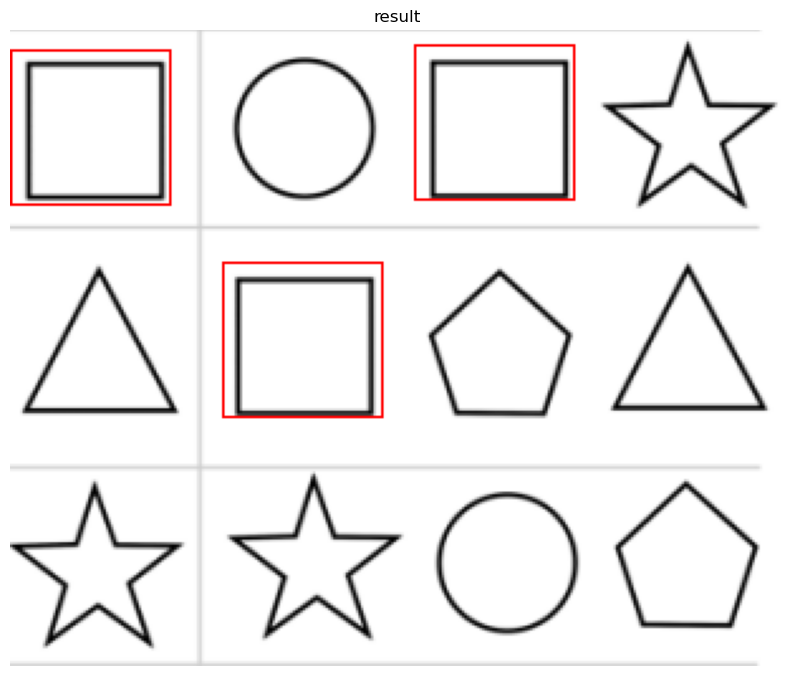

In [189]:
# 显示结果
plt.figure(figsize=(10, 10))
plt.title("result")
plt.imshow(result_image)
plt.axis("off")
plt.show()